<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Automatic_Differentiation_With_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import torch
from torch import nn
from torchvision import datasets
from torch.utils.data import Dataset
from torchvision.transforms import Lambda, ToTensor
import matplotlib.pyplot as plt

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
#Load the training data 
train_dataset = datasets.FashionMNIST(
    root ="data",
    train= True,
    download = True,
    transform = ToTensor(),
    target_transform=  Lambda(lambda y:torch.zeros(10,dtype=torch.float).scatter_(0, torch.tensor(y),value=1))
    )

In [44]:
#Load the testing data and set train attribute to false 
test_data =  datasets.FashionMNIST(
    root = "data",
    download = True,
    train = False,
    transform = ToTensor(),
    target_transform= Lambda(lambda y:torch.zeros(10, dtype=torch.float).scatter_(0,torch.tensor(y),value=1))
    )

In [26]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

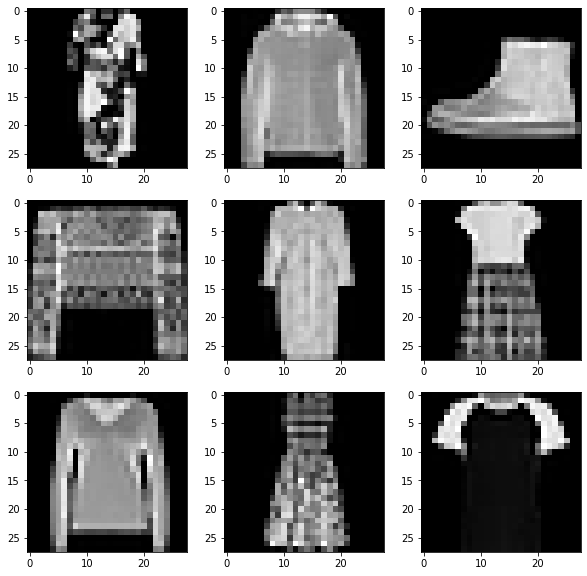

In [29]:
#We visualise the data first before passing it to our computational graph 
figure = plt.figure(figsize = (10,10))
cols,rows = 3,3
for i in range(1,rows * cols + 1):
    simple_idx =  torch.randint(len(train_dataset), size=(1,)).item()
    images, labels = train_dataset[simple_idx]
    figure.add_subplot(rows,cols, i)
    plt.imshow(images.squeeze(), cmap ='gray')
#    plt.title(labels_map[labels[i]])

In [38]:
#We now build our computational graph 
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()
    self.layers_relu_stack = nn.Sequential(
        nn.Linear(28 * 28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,10)
    )
  def forward(self,x):
    x = self.flatten(x)
    logits = self.layers_relu_stack(x)
    return logits

In [39]:
#Create an instance of the model and pass it to the GPU 
model = NeuralNetwork().to(device)

In [47]:
#After passing our model to the GPU We can now pass data through the computation graph and check how well the model computes 
x = torch.randn(1,28,28, device = device) #Input data to our model 
#Make the prediction 
logits = model(x) #Model makes a prediction 
pred_prob = nn.Softmax(dim = 1)(logits) #Get the probality distribution of our model
y_pred = pred_prob.argmax(1) #Get the index of the maximum argument from our probability distribution that class is our predicted class

Automatic Differentiation with Pytorch:
Let's build a single layer neural network and compute the loss


In [60]:
#Inputs : Learned features
x = torch.ones(5)
#Targets: Expected outputs which will be compared to the ground truth
y = torch.zeros(3)
#Weights: Connection between units of different layers from both previous/preceeding
w = torch.randn(5,3, requires_grad=True)
#The bias term : is used to delay the activation of a node: Shift the activation curve to the left or right 
b = torch.randn(3,requires_grad=True)
#Linear function: Calculate the dot product I.e: The multiplication of the weights by the inputs x  and add a bias term to shift the activation 
z = torch.matmul(x,w) + b
#Calculate the loss 
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)